<h1 align="center">DESAFÍO ALURA LATAM PHYTON PARA DATA SCIENCE - Visualización de datos</h1>



> Presentado por: **Gabriel Enrique Montes Lambis**

> Fecha: 2025

<br>
<h2 align="center">Descripción del Contexto</h2>
<p align="justify">
Para la presentación de este challenge, he decidido usar un dataset obtenido de la plataforma GitHub <strong><a href="https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv" target="_blank">CÓDIGO BASE</a></strong>, que contiene los datos estadísticos de diferentes porcentajes de 4 tiendas pertenecientes al Sr. Juan
</p>
<p align="justify">
La fuente de datos de este ejercicio se encuentra en <i>un repositorio</i>, para que su carga sea más simple al momento de la validación. El archivo usado se puede encontrar en:</p>
<br>

*  url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"

* url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
* url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
* url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


<br>
<p align="justify">
Para permitir que la fuente de datos sea cargada desde la Libreria Pandas &reg; fué necesario que el archivo tuviera permisos de lectura para "cualquiera con el link".
</p>
<br>
<h2 align="center">Contenido de la actividad</h2>
<p align="justify">

</p>
<br>
<p align="justify">
A continuación describiremos los pasos y ajustes realizados a la data para obtener las gráficas deseadas.
</p>


### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



     Tienda        Precio
0  Tienda 1  1.150880e+09
1  Tienda 2  1.116344e+09
2  Tienda 3  1.098020e+09
3  Tienda 4  1.038376e+09


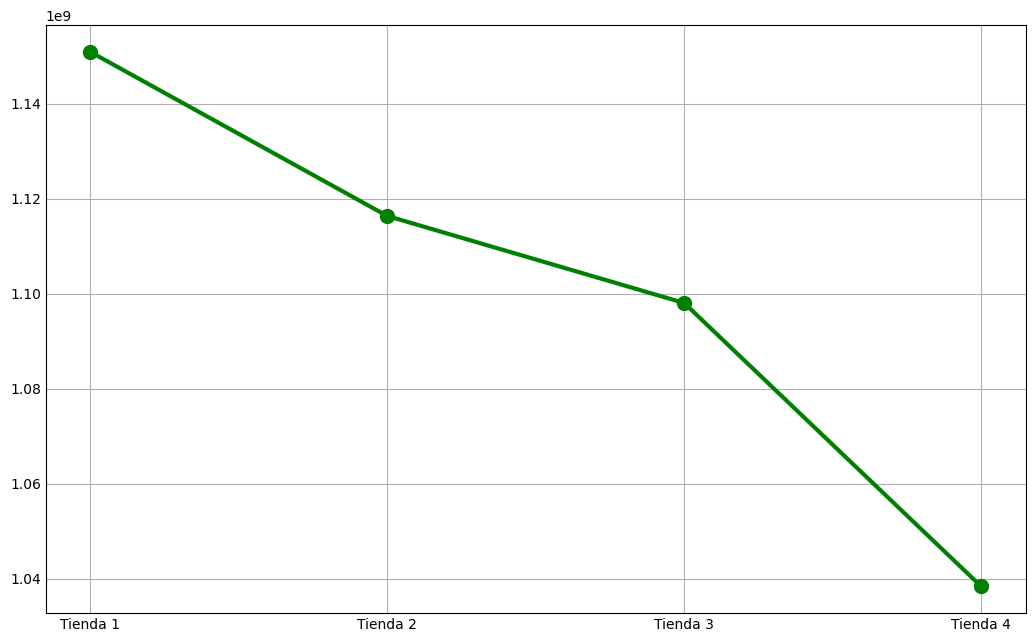

In [ ]:
dtienda = tienda['Precio'].sum()

dtienda2 = tienda2['Precio'].sum()

dtienda3 = tienda3['Precio'].sum()

dtienda4 = tienda4['Precio'].sum()

facturacion_tiendas = {
                'Tienda':['Tienda 1',
                'Tienda 2',
                'Tienda 3',
                'Tienda 4'],
                'Precio':[dtienda,
                dtienda2,
                dtienda3,
                dtienda4]}

df_facturacion_tienda=pd.DataFrame(facturacion_tiendas)
print(df_facturacion_tienda)

import matplotlib.pyplot as plt

x_values = df_facturacion_tienda['Tienda'].unique()
y_values = df_facturacion_tienda['Precio']

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, color='green', linewidth=3, marker='o', markersize=10)
plt.show()
plt.close('all')

Conclusión: La tienda de menos facturación en la tienda 4

# 2. Ventas por categoría

<ipython-input-35-1ab44f8d4624>:45: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


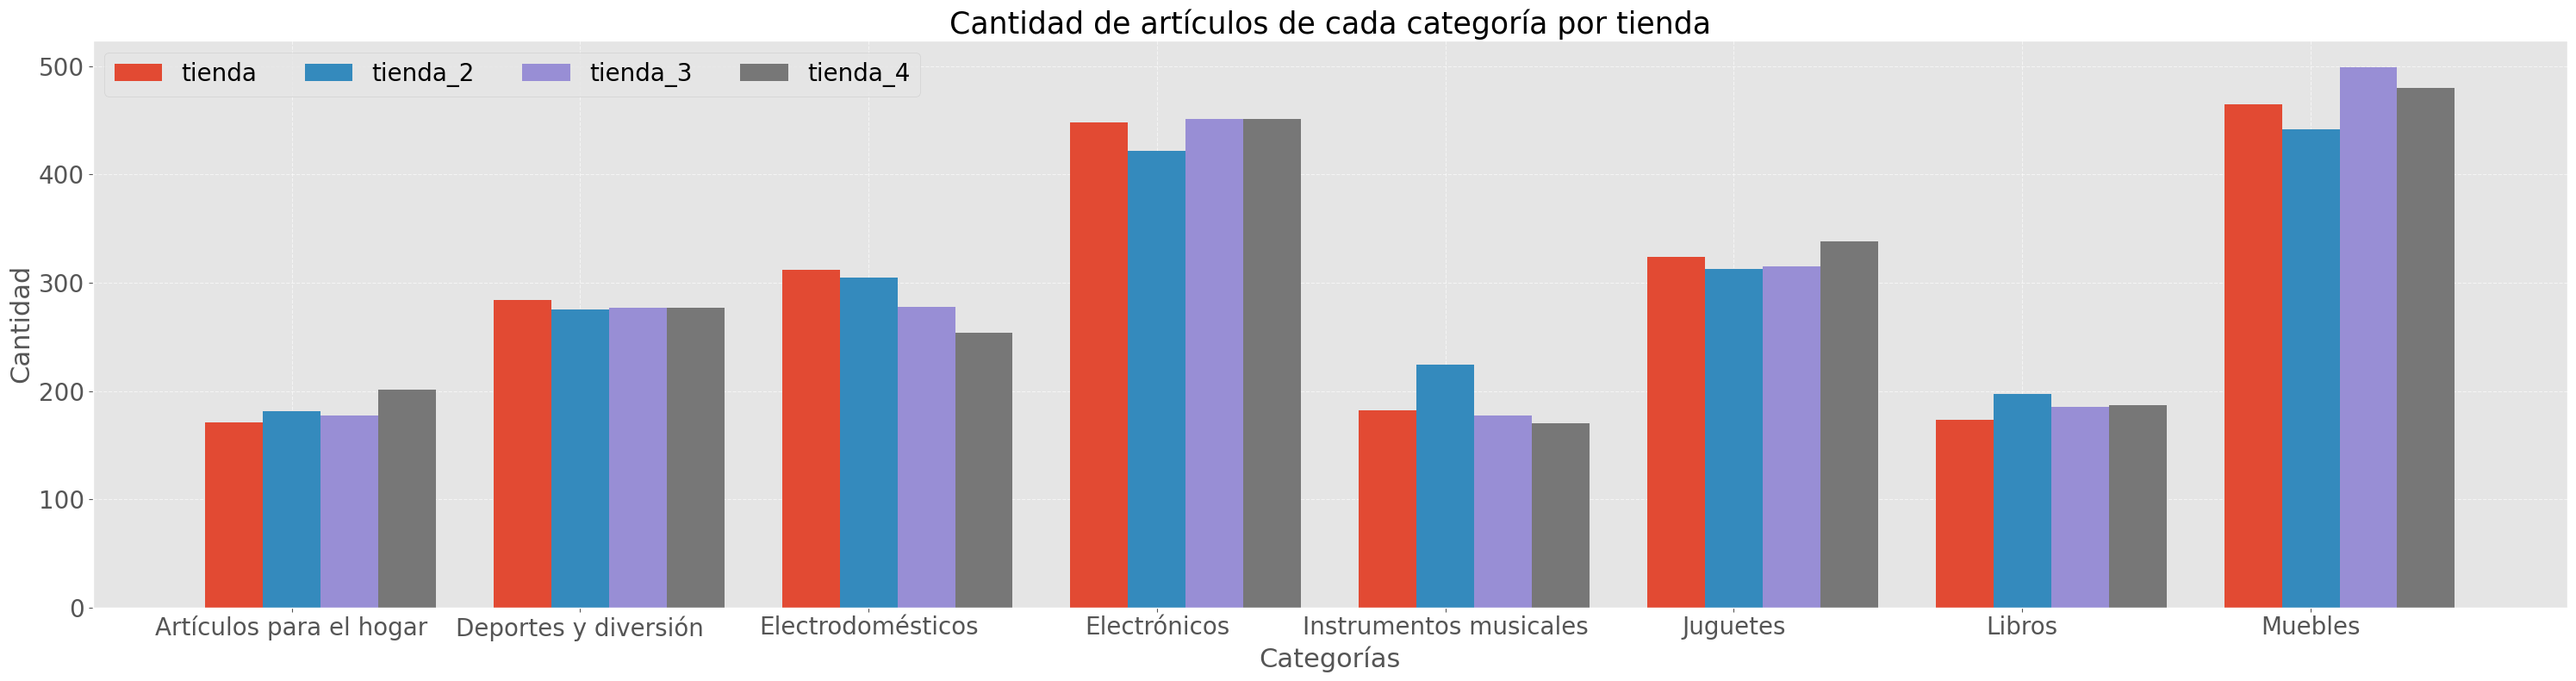

In [ ]:
tupla1 = list(zip(tienda['Categoría del Producto'], tienda['Precio']))

categoria = sorted(list(set(list(tienda['Categoría del Producto']))))

def categoria_contador(sucursal):
  categorias_tienda = (sucursal['Categoría del Producto'])
  cantidades_por_categoria = []
  for n in categoria:
    contador_categoria = 0
    for i in categorias_tienda:
      if i == n:
        contador_categoria += 1
    cantidades_por_categoria.append(contador_categoria)
  return cantidades_por_categoria

# Externo de la función
resultados_categorias = {
    'tienda': categoria_contador(tienda),
    'tienda_2': categoria_contador(tienda2),
    'tienda_3': categoria_contador(tienda3),
    'tienda_4': categoria_contador(tienda4)
}

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(categoria))
width = 0.2
multiplier = 0

plt.subplots(layout='constrained', figsize=(30,8))

for atributo, medida in resultados_categorias.items():
  offset = width*multiplier
  barras = plt.bar(x + offset, medida, width, label=atributo)
  multiplier +=1
plt.xticks(x + width, categoria, fontsize= 20)
plt.legend(loc='upper left', ncols= len(categoria),fontsize= 20)
plt.yticks(fontsize= 20)
plt.title('Cantidad de artículos de cada categoría por tienda', fontsize=25)
plt.xlabel('Categorías', fontsize=22)
plt.ylabel('Cantidad', fontsize=22)
plt.grid(True, linestyle='--', alpha=0.6)
plt.style.use('ggplot')
plt.tight_layout()
plt.show()

Pasar visualizar lo anterior en un grafico de lineas se procede:

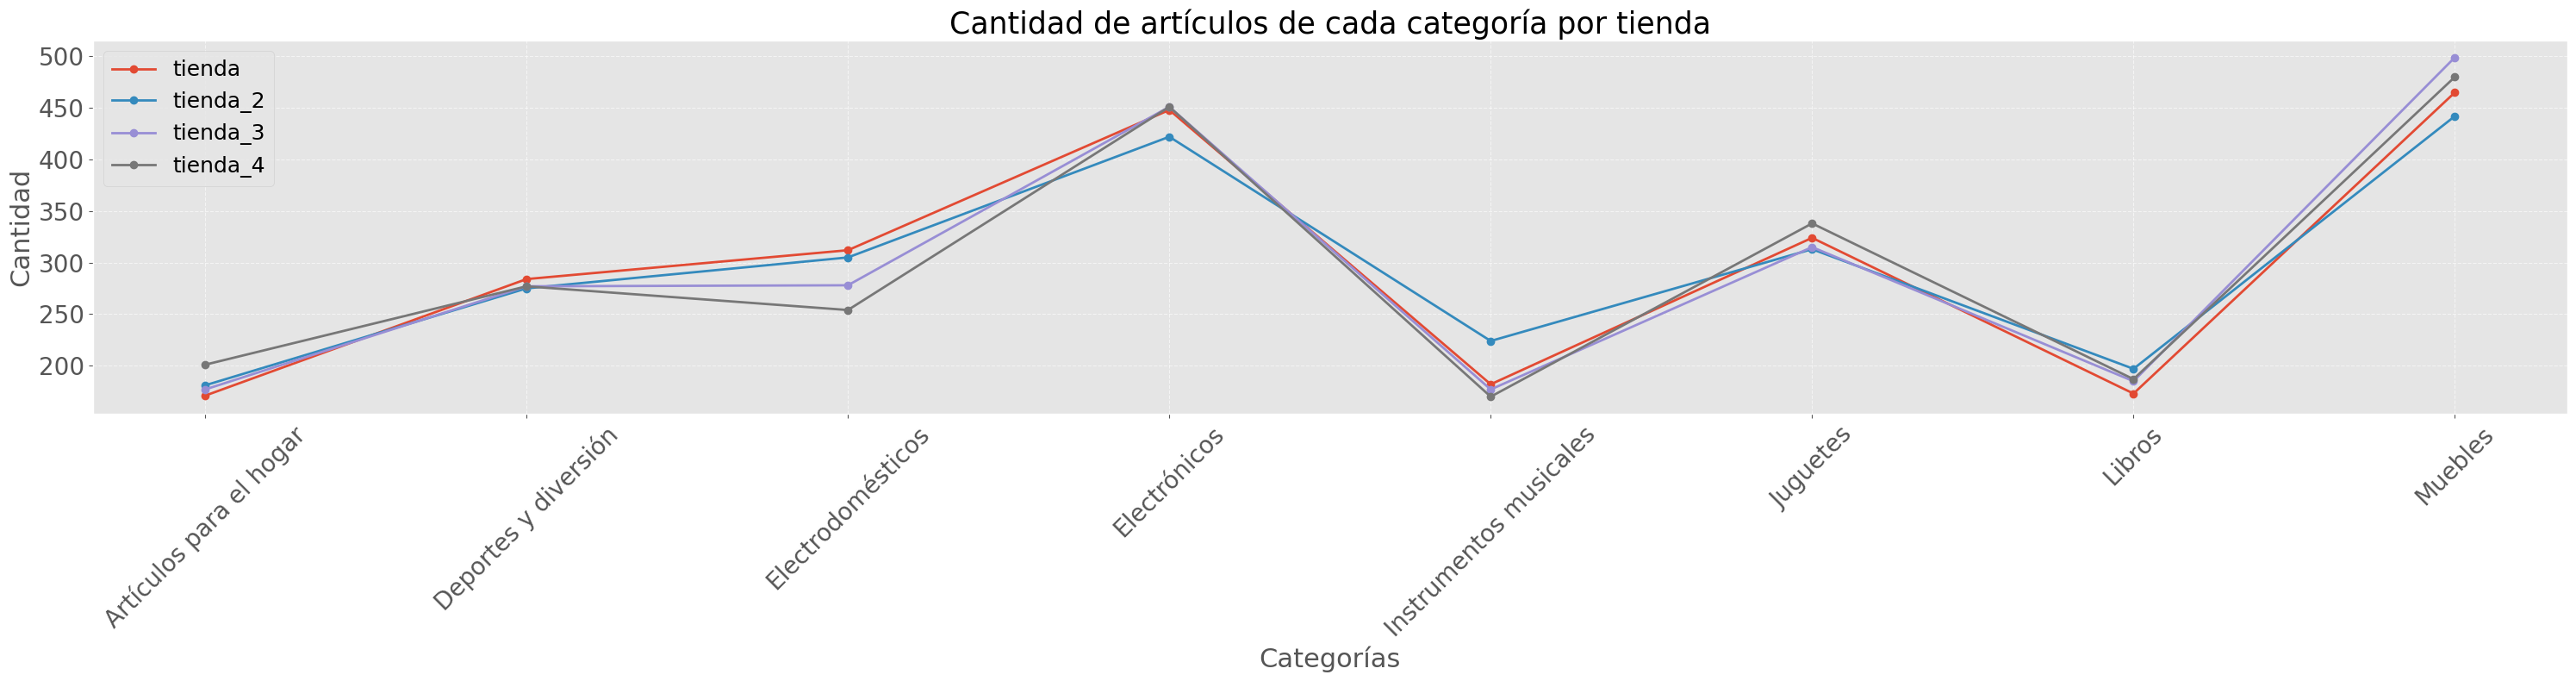

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(categoria))

plt.figure(figsize=(30, 8))
plt.style.use('ggplot')


for nombre_tienda, cantidades in resultados_categorias.items():
    plt.plot(x, cantidades, marker='o', linewidth=2, label=nombre_tienda)


plt.xticks(x, categoria, rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.title('Cantidad de artículos de cada categoría por tienda', fontsize=25)
plt.xlabel('Categorías', fontsize=22)
plt.ylabel('Cantidad', fontsize=22)
plt.legend(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Si queremos ver los resultados aún más claros

In [ ]:
import pandas as pd

# Convertir el diccionario a un DataFrame para visualizarlo mejor
df_resultados = pd.DataFrame(resultados_categorias, index=categoria)
print(df_resultados)

# Ordenar cada columna (tienda) en orden descendente
ordenadas_por_tienda = {}

for tienda_nombre in df_resultados.columns:
    ordenadas_por_tienda[tienda_nombre] = df_resultados[tienda_nombre].sort_values(ascending=False)

# Mostrar resultados
for tienda, serie in ordenadas_por_tienda.items():
    print(f"\n{tienda.upper()} (categorías en orden descendente):")
    print(serie)

# Sumar los totales por tienda
totales_por_tienda = df_resultados.sum()

# Ordenar de menor a mayor
tienda_menor_ventas = totales_por_tienda.sort_values()

print("👉 Tiendas ordenadas por total de productos registrados (de menor a mayor):\n")
print(tienda_menor_ventas)

# Mostrar solo la que vendió menos
print(f"\n🔻 La tienda con menor cantidad total de productos es: **{tienda_menor_ventas.idxmin()}** con {tienda_menor_ventas.min()} productos.")


                         tienda  tienda_2  tienda_3  tienda_4
Artículos para el hogar     171       181       177       201
Deportes y diversión        284       275       277       277
Electrodomésticos           312       305       278       254
Electrónicos                448       422       451       451
Instrumentos musicales      182       224       177       170
Juguetes                    324       313       315       338
Libros                      173       197       185       187
Muebles                     465       442       499       480

TIENDA (categorías en orden descendente):
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: tienda, dtype: int64

TIENDA_2 (categorías en orden descendente):
Muebles                    442
Electrónicos               422
Juguetes         

# 3. Calificación promedio de la tienda


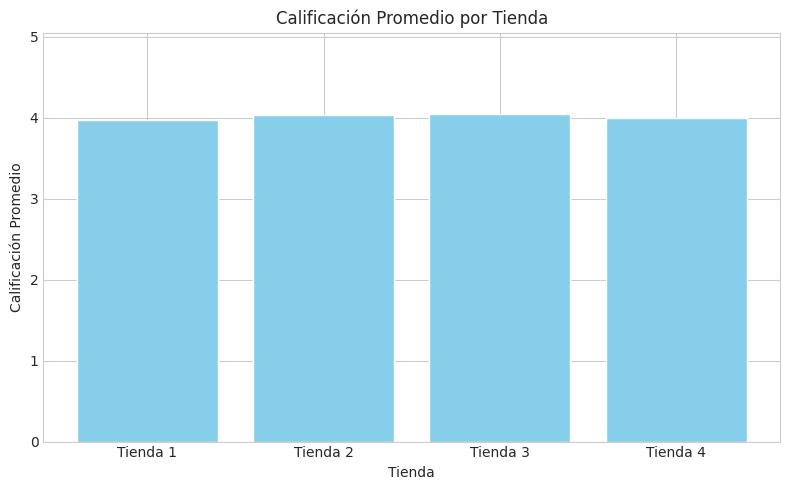

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

tienda_1 = tienda
tienda_2 = tienda2
tienda_3 = tienda3
tienda_4 = tienda4

cal_1 = tienda_1["Calificación"].dropna().values
cal_2 = tienda_2["Calificación"].dropna().values
cal_3 = tienda_3["Calificación"].dropna().values
cal_4 = tienda_4["Calificación"].dropna().values

promedio_tienda_1 = np.mean(cal_1) if len(cal_1) > 0 else 0
promedio_tienda_2 = np.mean(cal_2) if len(cal_2) > 0 else 0
promedio_tienda_3 = np.mean(cal_3) if len(cal_3) > 0 else 0
promedio_tienda_4 = np.mean(cal_4) if len(cal_4) > 0 else 0

promedios = [promedio_tienda_1, promedio_tienda_2, promedio_tienda_3, promedio_tienda_4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, promedios, color='skyblue')

plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')
plt.ylim(0, max(promedios) + 1)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

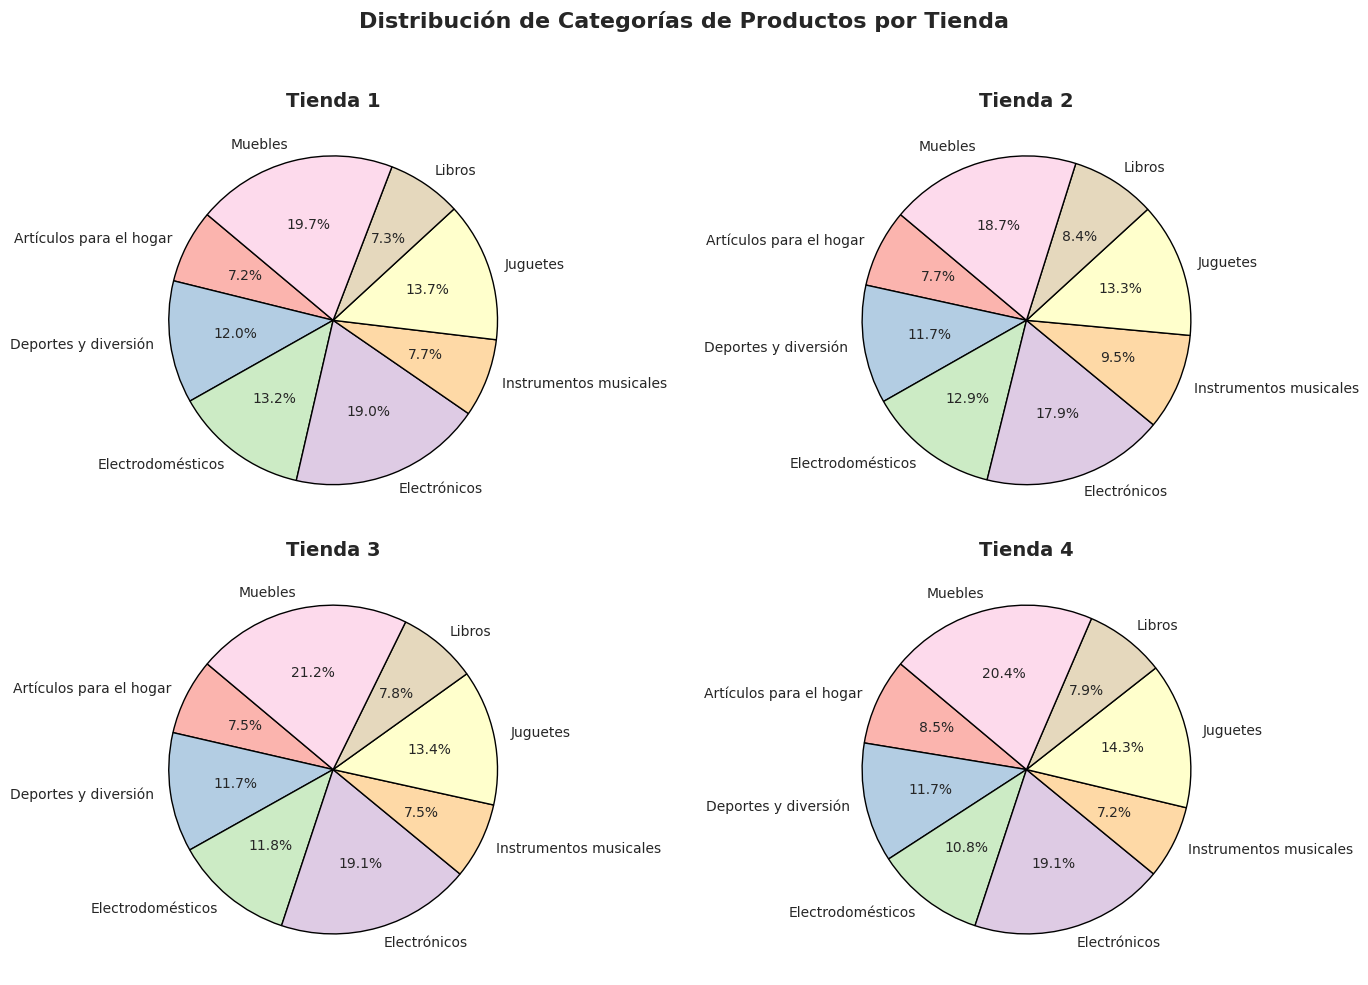

In [ ]:
import matplotlib.pyplot as plt


categoria = sorted(list(set(tienda['Categoría del Producto'])))


def categoria_contador(sucursal):
    categorias_tienda = sucursal['Categoría del Producto']
    cantidades_por_categoria = []
    for n in categoria:
        contador_categoria = 0
        for i in categorias_tienda:
            if i == n:
                contador_categoria += 1
        cantidades_por_categoria.append(contador_categoria)
    return cantidades_por_categoria

resultados_categorias = {
    'Tienda 1': categoria_contador(tienda),
    'Tienda 2': categoria_contador(tienda2),
    'Tienda 3': categoria_contador(tienda3),
    'Tienda 4': categoria_contador(tienda4)
}


fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs = axs.flatten()

colores = plt.cm.Pastel1.colors

for i, (nombre_tienda, datos) in enumerate(resultados_categorias.items()):
    axs[i].pie(
        datos,
        labels=categoria,
        autopct='%1.1f%%',
        startangle=140,
        colors=colores,
        wedgeprops={'edgecolor': 'black'}
    )
    axs[i].set_title(nombre_tienda, fontsize=14, fontweight='bold')

# Título general
plt.suptitle('Distribución de Categorías de Productos por Tienda', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<h1>Los productos organizados de mayor a menor por tienda serian entonces:</h1>

**Tienda 1:** Electrónicos, Muebles, Deportes y diversión, Electrodomésticos, Juguetes, Artículos para el hogar, Instrumentos musicales, Libros

**Tienda 2:** Electrónicos, Muebles, Juguetes, Electrodomésticos, Deportes y diversión, Artículos para el hogar, Instrumentos musicales, Libros

**Tienda 3:** Muebles, Electrónicos, Deportes y diversión, Electrodomésticos, Juguetes, Artículos para el hogar, Instrumentos musicales, Libros

**Tienda 4:** Electrónicos, Muebles, Juguetes, Deportes y diversión, Electrodomésticos, Artículos para el hogar, Instrumentos musicales, Libros


# 5. Envío promedio por tienda

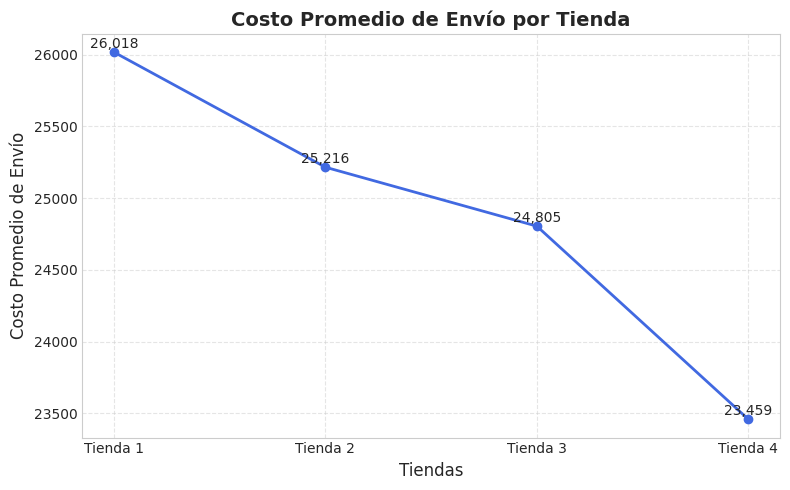

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tienda_1 = tienda
tienda_2 = tienda2
tienda_3 = tienda3
tienda_4 = tienda4

costoEnvTienda1 = int(tienda['Costo de envío'].mean())
costoEnvTienda2 = int(tienda2['Costo de envío'].mean())
costoEnvTienda3 = int(tienda3['Costo de envío'].mean())
costoEnvTienda4 = int(tienda4['Costo de envío'].mean())

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costosTiendas = [costoEnvTienda1, costoEnvTienda2, costoEnvTienda3, costoEnvTienda4]
colores = ['#FF6B6B', '#FFA94D', '#51CF66', '#38D9A9']  # Para usar en puntos si se desea

sns.set_style('whitegrid')

plt.figure(figsize=(8, 5))
plt.plot(tiendas, costosTiendas, marker='o', linewidth=2, color='royalblue')
plt.title('Costo Promedio de Envío por Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Costo Promedio de Envío', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for i, valor in enumerate(costosTiendas):
    plt.text(i, valor + 10, f'{valor:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

  Conclusión: El gráfico muestra que los costos promedio de envío varían entre tiendas, lo que sugiere una distribución desigual. Algunas tiendas tienen costos más altos, posiblemente por factores como mayor distancia de entrega, transporte más caro o menor eficiencia logística.